# Изучение рынка компьютерных игр


# Задача

Необходимо изучить рынок игр и выявить определяющие успешность игры закономерности, проанализировать продажи игр по годам, платформам, жанрам, составить портрет пользователя различных регионов, проверить статистические гипотезы.

# Описание данных

Исторические данные о продажах игр, оценках пользователей и экспертов, жанрах и платформах.

## План

 - Загрузка данных
 - [Предобработка данных](#preprocessing)
 - [Исследовательский анализ данных](#eda)
    - [Анализ игр по годам](#genres)
    - [Анализ по платформам](#platformes)
    - [Анализ жанров](#genres)
 - [Портрет пользователя каждого региона](#portret)
 - [Гипотезы:](#hypothesis)
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports
 - [Выводы](#conclusions)

# 1. Загрузка данных

In [1]:
import pandas as pd
data_games =  pd.read_csv('D:/Работа/Яндекс.Практикум/Проекты/!github/games market/games.csv')

In [2]:
import warnings 
warnings.simplefilter("ignore")

In [3]:
data_games.info()
data_games.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Пропущенные значения в years of release (мало).
Critic_Score	User_Score	Rating (и кстати пропуски идут во всех трех столбцах сразу, но судя по info не всегда)

# 2. Предобработка данных <a id=preprocessing>

In [4]:
# приводим названия столбцов к нижнему регистру
data_games.columns = data_games.columns.str.lower()
print(data_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [5]:
data_games['year_of_release'].isna().sum()

269

In [6]:
#удаляем пропуски
data_games.dropna(subset = ['year_of_release'], inplace=True)

In [7]:
#вычищаем другие незначачительные пропуски
data_games.dropna(subset = ['name'], inplace=True)

In [8]:
data_games['year_of_release']= data_games['year_of_release'].astype('int')

Основная проблема в рейтингах. Но, если залезть в википедию, их начали ставить только играм с 1996 года. Вряд ли нас будут интересовать такие древние даты. Сделаем срез нчиная с 2000. (более ранние, нам будут вряд ли интересны)

In [9]:
data_games.pivot_table(index='genre', columns='rating',  values='year_of_release', aggfunc='count')

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,410.0,468.0,1.0,NaN,596.0,NaN,670.0
Adventure,NaN,159.0,67.0,2.0,NaN,98.0,NaN,114.0
Fighting,NaN,8.0,19.0,NaN,NaN,48.0,NaN,357.0
Misc,NaN,449.0,166.0,5.0,1.0,13.0,NaN,228.0
Platform,NaN,354.0,141.0,NaN,NaN,3.0,NaN,63.0
Puzzle,NaN,284.0,42.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,576.0,95.0,NaN,NaN,18.0,NaN,167.0
Role-Playing,NaN,83.0,111.0,NaN,NaN,161.0,NaN,415.0
Shooter,NaN,47.0,56.0,NaN,NaN,553.0,NaN,340.0


Нет столбца на основании которого мы могли бы заполнить rating.

In [10]:
data_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#user_score
user_score находится в стоиянии object, потому что там есть tbd, что означает to be determined, т. е по сутине определено, т. е. nan

In [11]:
data_games['user_score'] = pd.to_numeric(data_games['user_score'], errors='coerce')

In [12]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


In [13]:
data_games['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Critic_score и user_score пока не будем заполнять. Во-первых до 1996 года этих оценок в принципе не существовало, а данные за этот период нам скорее всего не понадобятся. Во вторых там достаточно большое количество пропусков и их заполнение изменит среднее, дисперсию и т. п и тем самым исказить взаиомсвязи. В дальнейшем будет стоять задача посмотреть влияние оценок пользователей на продажи. Будет странно смотреть влияние оценок, которых не было, на продажи.

In [14]:
#вычисляем суммарные продажи во всех регионах
data_games['world_sales']=data_games['na_sales']+ data_games['eu_sales'] + data_games['jp_sales']+data_games['other_sales']
display(data_games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [15]:
data_games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,world_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


 # 3. Исследовательский анализ данных <a id='eda'> </a>

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

## Анализ игр по годам <a id='years'> </a>

In [17]:
game_years = data_games.pivot_table(index='year_of_release', values='name', aggfunc='count')

С 1980 по 1990 выпускалось очень мало игр. Пик приходит 2008 - 2009. Но для сапоставления с текущим периодом можно взять период с начала 2000.

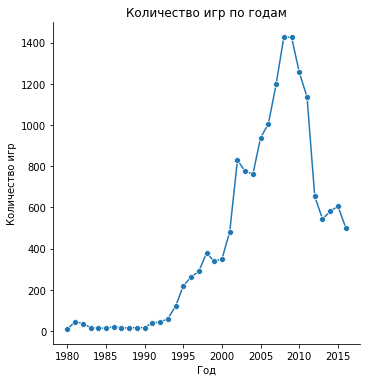

In [18]:
#sns.set(style="darkgrid", palette='rainbow')
sns.relplot(kind="line", markers=True, data=game_years, legend=False, style='dark')
plt.title('Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

In [19]:
# Смотрим как менялись продажи по платформам
platform_sales = data_games.pivot_table(index='platform', values='world_sales', aggfunc='sum')
display(platform_sales.sort_values(by='world_sales', ascending=False))

,world_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [20]:
#отсекаем маленькие платформы
platform_list = platform_sales.query('world_sales>250').index
platform_top = platform_sales.query('world_sales>300').index

data_games.query('platform in @platform_list').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')

platform,3DS,DS,GB,GBA,NES,PC,PS,PS2,PS3,PS4,PSP,Wii,X360,XB
year_of_release,,,,,,,,,,,,,,
1983,NaN,NaN,NaN,NaN,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,NaN,50.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,NaN,0.02,NaN,NaN,53.44,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,1.43,NaN,45.01,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,64.97,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,4.89,NaN,15.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,NaN,5.57,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


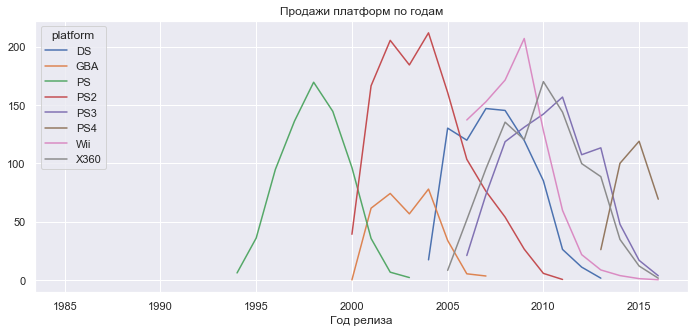

In [21]:
top_data = data_games.query('platform in @platform_top').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
sns.set(rc={'figure.figsize':(11.7,5)})
top_data.plot().set_title('Продажи платформ по годам')
plt.xlabel('Год релиза')
plt.show()

Из графика видно что платформа существует около 10 лет

 Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Берем последние 5 лет. Потому что за этот период будет видно падает или растет платформа.

## Платформы <a id='platformes'> </a>

In [22]:
data_actual = data_games.query('year_of_release>2011')
data_actual.pivot_table(index='platform', columns='year_of_release', values='world_sales', aggfunc='sum').sort_values(by=2015, ascending=False)

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
PS4,NaN,25.99,100.00,118.90,69.25
XOne,NaN,18.96,54.07,60.14,26.15
3DS,51.36,56.57,43.76,27.78,15.14
PS3,107.36,113.25,47.76,16.82,3.60
WiiU,17.56,21.65,22.03,16.35,4.60
X360,99.74,88.58,34.74,11.96,1.52
PC,23.22,12.38,13.28,8.52,5.25
PSV,16.19,10.59,11.90,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18


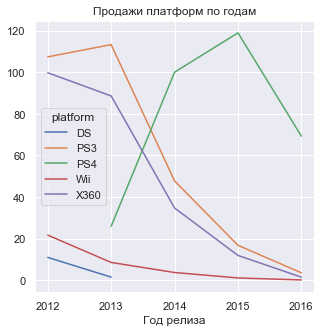

In [23]:
top_data_actual = data_actual.query('platform in @platform_top').pivot_table(index='year_of_release', columns='platform', values='world_sales', aggfunc='sum')
sns.set(rc={'figure.figsize':(5,5)})
top_data_actual.plot().set_title('Продажи платформ по годам')
plt.xlabel('Год релиза')
plt.show()

In [24]:
data_platform = data_actual.groupby('platform')['world_sales'].sum().sort_values(ascending=False).reset_index()
display(data_platform)

,platform,world_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


Поскольку за 2016 год данные неполные, то нужно смотреть на 2015 год. Растут платформа PS4, XOne. PS3, X360, 3DS падают.

### Ящик с усами

count    2886.000000
mean        0.501223
std         1.249157
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: world_sales, dtype: float64

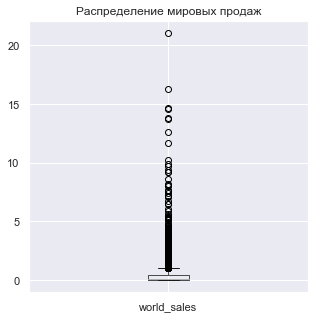

In [25]:
data_actual.boxplot('world_sales').set_title('Распределение мировых продаж')
data_actual['world_sales'].describe()

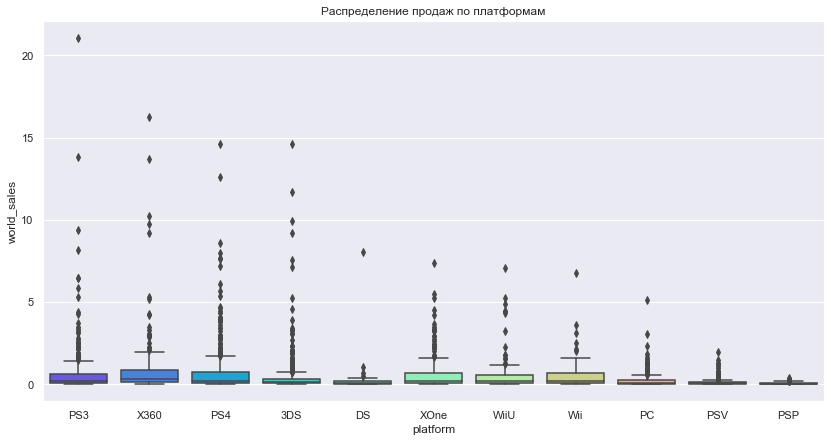

In [26]:
sns.set(rc={'figure.figsize':(14,7)})
sns.boxplot(x="platform", y="world_sales", palette='rainbow', data=data_actual).set_title('Распределение продаж по платформам')
plt.show()

На графике видно много игр, продажа которых значительно больше средних продаж игр. Они являются своего рода хитами. Если смотреть на разрос продаж по платформам, то средние продажи игр по разным платформам не так сильно различаются, но у разных платформ разно количество хитовых игр, которые делают им продажи.

 ### Диаграммы рассеяния и корреляция между отзывами и продажами

PS4
Корреляция продаж и оценок критиков  0.41
Корреляция продаж и оценок пользователей -0.03
PS3
Корреляция продаж и оценок критиков  0.33
Корреляция продаж и оценок пользователей -0.01
X360
Корреляция продаж и оценок критиков  0.36
Корреляция продаж и оценок пользователей  0.01


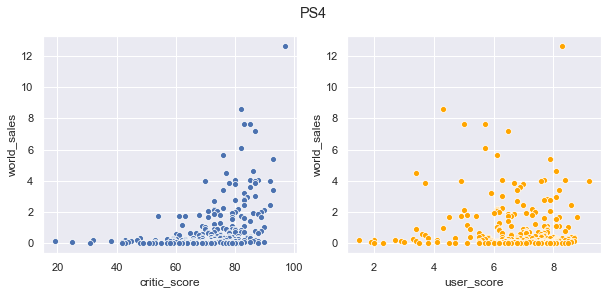

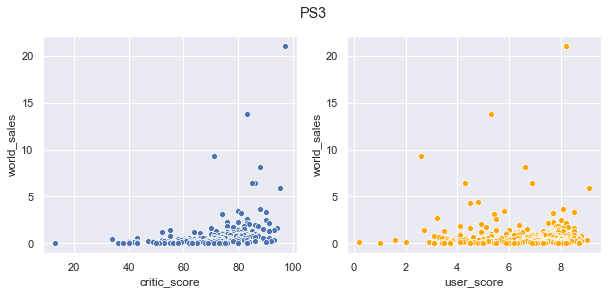

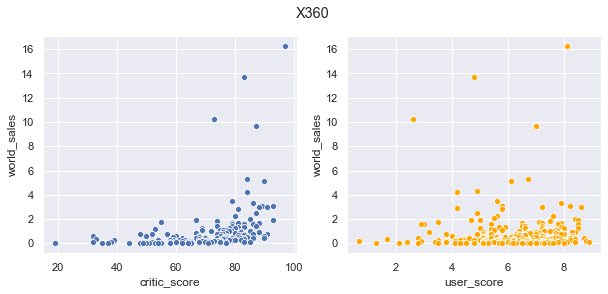

In [27]:
list1 = ['PS4', 'PS3', 'X360']

for a in list1:
    print(a)
    data_x = data_actual.loc[data_actual['platform'] == a]
    fig, ax_all = plt.subplots(figsize = (10, 4))
    fig.suptitle(a)
    ax1=plt.subplot(1, 2, 1)
    sns.scatterplot(x='critic_score', y='world_sales', data=data_x)
    ax2=plt.subplot(1, 2, 2)
    sns.scatterplot(x='user_score', y='world_sales',  data=data_x, color='orange')
    print('Корреляция продаж и оценок критиков {: 0.2f}'.format(data_x['world_sales'].corr(data_x['critic_score'])))
    print('Корреляция продаж и оценок пользователей {: 0.2f}'.format( data_x['world_sales'].corr(data_x['user_score']) ) )
    



Корреляция между оценками критиков и пользователей довольрно низкая. По графикам видно, что оценка может больше 80 у критиков и 8 у пользователей, но продажи у игр низкие. Однако корреляция оценок критиков все-таки больше (у всех трех платформ 0.3-0.4), чем пользователей (0).

## Жанры <a id='genres'> </a>

In [28]:
data_genre = data_actual.pivot_table(index='genre', values='world_sales', aggfunc=['sum', 'mean', 'count'])
data_genre.columns = ['world_sales', 'mean', 'number']
data_genre = data_genre.sort_values(by='world_sales', ascending=False)
display(data_genre)

,world_sales,mean,number
genre,,,
Action,441.12,0.427856,1031
Shooter,304.73,1.296723,235
Role-Playing,192.80,0.521081,370
Sports,181.07,0.675634,268
Misc,85.04,0.442917,192
Platform,61.00,0.717647,85
Racing,53.50,0.465217,115
Fighting,44.49,0.408165,109
Simulation,35.12,0.439000,80


Самый доходный жанр action (и он же лидер по количеству игр), на втором месте shooter(хотя в среднем shooter зарабатывает больше, чем action), третьем Role-Playing. Самые неприбыльные жанры стратегии и пазлы. Возможно пазлы перешли в mobile.

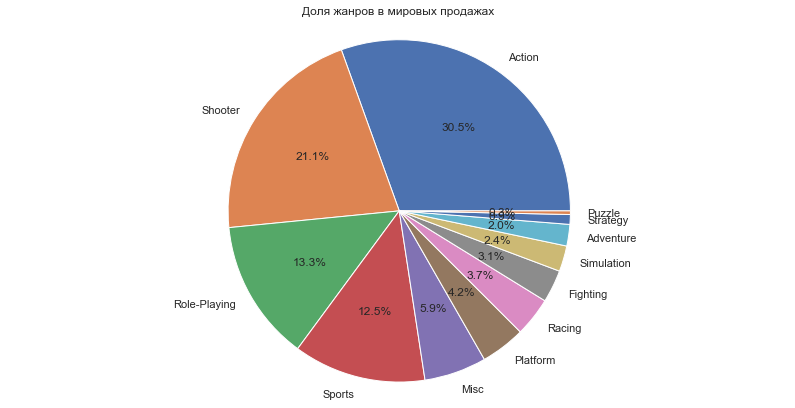

In [29]:
labels_genre = data_genre.index
sizes_genre = data_genre['world_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes_genre, labels=labels_genre, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')  

plt.title('Доля жанров в мировых продажах')
plt.show()

# 4. Портрет пользователя каждого региона <a id='portret'> </a>


 ### Самые популярные платформы (топ-5)

In [30]:
data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

data_na_sales = data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by ='na_sales', ascending=False).reset_index()
na_sales_total = data_actual['na_sales'].sum()
data_na_sales['share'] = data_na_sales['na_sales']/na_sales_total
display(data_na_sales)

,platform,na_sales,share
0,X360,140.05,0.236983
1,PS4,108.74,0.184003
2,PS3,103.38,0.174933
3,XOne,93.12,0.157571
4,3DS,55.31,0.093592
5,WiiU,38.10,0.064470
6,PC,19.12,0.032354
7,Wii,17.45,0.029528
8,PSV,10.98,0.018580
9,DS,4.59,0.007767


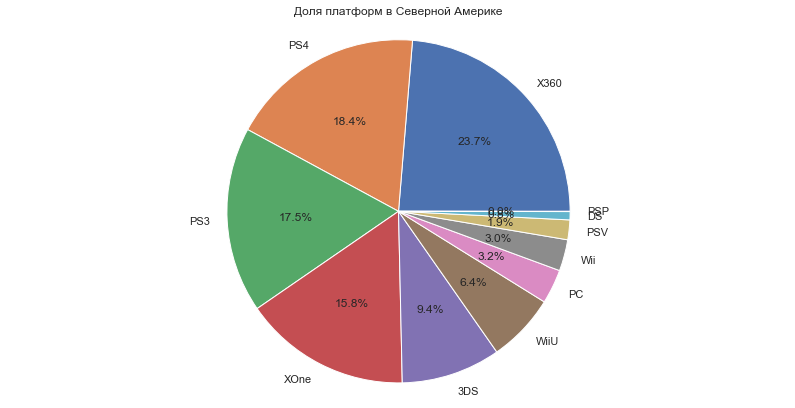

In [31]:
labels_na = data_na_sales['platform']
sizes_na = data_na_sales['na_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes_na, labels=labels_na, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')  

plt.title('Доля платформ в Северной Америке')
plt.show()

In [32]:
data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

data_eu_sales = data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by ='eu_sales', ascending=False).reset_index()
eu_sales_total = data_actual['eu_sales'].sum()

data_eu_sales['share'] = data_eu_sales['eu_sales']/eu_sales_total
display(data_eu_sales)

,platform,eu_sales,share
0,PS4,141.09,0.278383
1,PS3,106.86,0.210844
2,X360,74.52,0.147034
3,XOne,51.59,0.101792
4,3DS,42.64,0.084132
5,PC,37.76,0.074504
6,WiiU,25.13,0.049584
7,Wii,11.92,0.023519
8,PSV,11.36,0.022414
9,DS,3.53,0.006965


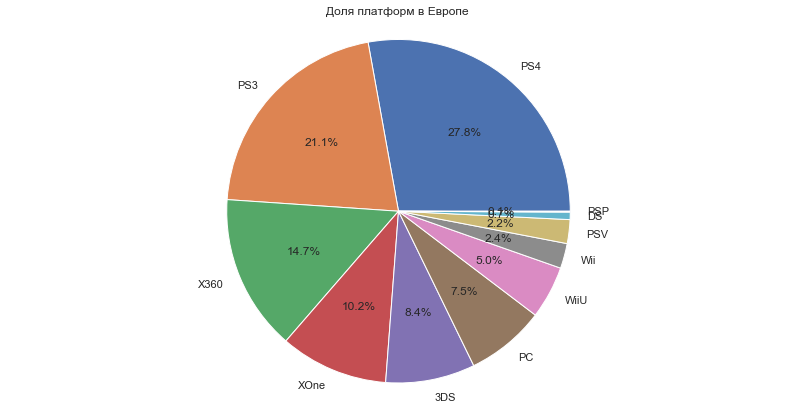

In [33]:
labels_eu = data_eu_sales['platform']
sizes_eu = data_eu_sales['eu_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes_eu, labels=labels_eu, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')  

plt.title('Доля платформ в Европе')
plt.show()

In [34]:
data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

data_jp_sales = data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
jp_sales_total = data_actual['jp_sales'].sum()

data_jp_sales['share'] = data_jp_sales['jp_sales']/jp_sales_total
display(data_jp_sales)

,platform,jp_sales,share
0,3DS,87.79,0.455862
1,PS3,35.29,0.183249
2,PSV,21.04,0.109253
3,PS4,15.96,0.082875
4,WiiU,13.01,0.067556
5,PSP,10.47,0.054367
6,DS,3.72,0.019317
7,Wii,3.39,0.017603
8,X360,1.57,0.008152
9,XOne,0.34,0.001766


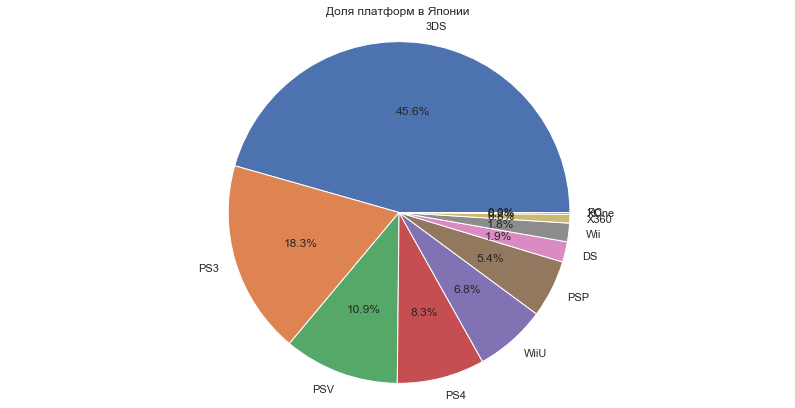

In [35]:
labels_jp = data_jp_sales['platform']
sizes_jp = data_jp_sales['jp_sales']

fig1, ax1 = plt.subplots()
ax1.pie(sizes_jp, labels=labels_jp, autopct='%1.1f%%', startangle=0)
ax1.axis('equal')  

plt.title('Доля платформ в Японии')
plt.show()

Самые популярные платфоры в США: 
X360 -24%, 
PS4 - 18%,
PS3 - 17%,
XOne - 16%,
3DS - 9%,

Европа:
PS4 - 28%,
PS3  - 21%, 
X360 - 15%, 
XOne - 10%, 
3DS - 8%,

Япония:
3DS - 46%
PS3 - 18%
PSV  - 11%
PS4 - 8%
WiiU  -7%

Европа и Северная Америка в целом похожи по топ 5 платформам, однако в Северной Америке лидирует X360 (24% рынка), а в Европе лидирует PS4 (28% ). Но Япония сильно отличается от западного мира. 46% занимает платформа 3DS.


### Самые популярные жанры (топ-5)

In [36]:
display('NA', data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False))
display('EU', data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))
display('JP', data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False))

'NA'

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Platform         25.38
Fighting         19.79
Racing           17.22
Adventure         8.92
Simulation        7.97
Strategy          4.23
Puzzle            1.13
Name: na_sales, dtype: float64

'EU'

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

'JP'

genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Misc             26.32
Platform         21.41
Simulation       14.55
Fighting         10.79
Adventure         9.46
Strategy          5.17
Puzzle            1.40
Name: eu_sales, dtype: float64

**Топ-5 жанров по регионам**

NA genre
 - Action          177.84
 - Shooter         144.77
 - Sports           81.53
 - Role-Playing     64.00
 - Misc             38.19

EU genre
 - Action          159.34
 - Shooter         113.47
 - Sports           69.09
 -  Role-Playing     48.53
 - Racing           27.29

JP genre
- Action          159.34
- Shooter         113.47
- Sports           69.09
- Role-Playing     48.53
- Racing           27.29

Вывод: Первые четрые жанра везде одинаковые: Action, Shooter, Sports, Role-playing

### Влияние рейтинга ESRB на продажи в регионах

In [37]:
data_actual['rating'] = data_actual['rating'].fillna('no_rating')

In [38]:
rating_sales = data_actual.pivot_table(index='rating', aggfunc='sum')
rating_sales.drop(['critic_score', 'user_score', 'year_of_release'], axis=1)


,eu_sales,jp_sales,na_sales,other_sales,world_sales
rating,,,,,
E,113.03,28.33,114.37,31.44,287.17
E10+,55.37,8.19,75.70,16.23,155.49
M,193.96,21.20,231.57,63.38,510.11
T,52.96,26.02,66.02,17.94,162.94
no_rating,91.50,108.84,103.31,27.17,330.82


In [39]:
print('Продажи в Европе {: 0.2f}'.format( data_actual['eu_sales'].sum()))
print('Продажи в Японии {: 0.2f}'.format( data_actual['jp_sales'].sum()))
print('Продажи в Северной Америке {: 0.2f}'.format( data_actual['na_sales'].sum()))

Продажи в Европе  506.82
Продажи в Японии  192.58
Продажи в Северной Америке  590.97


In [40]:
sales_platform_percent = rating_sales.iloc[:, [1, 2, 3, 4, 6]].apply(lambda x: round(x / x.sum() * 100, 1))
display(sales_platform_percent)

,eu_sales,jp_sales,na_sales,other_sales,world_sales
rating,,,,,
E,22.3,14.7,19.4,20.1,19.9
E10+,10.9,4.3,12.8,10.4,10.7
M,38.3,11.0,39.2,40.6,35.3
T,10.4,13.5,11.2,11.5,11.3
no_rating,18.1,56.5,17.5,17.4,22.9


В Япониии большую долю рынка занимают игры без рейтинга (более 50%). США и Европа очень похожи. По миру лидируют игры с рейтингом mature/ (35%), на втором everyone (около 20%).

# 5. Гипотезы <a id='hypothesis'> </a>

 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

In [41]:
data_user_score = data_actual.query('user_score > 0')

In [42]:
data_Xbox = data_user_score.loc[data_user_score['platform'] == 'XOne']
data_PC = data_user_score.loc[data_user_score['platform'] == 'PC']
print('Размер выборки Xbox', data_Xbox.shape)
print('Размер выборки PC',data_PC.shape)

print('Средний пользовательский рейтинг Xbox {: 0.1f}'.format(data_Xbox['user_score'].mean() )  )
print('Средний пользовательский рейтинг PC {: 0.1f}'.format(data_PC['user_score'].mean() ) )


Размер выборки Xbox (182, 12)
Размер выборки PC (206, 12)
Средний пользовательский рейтинг Xbox  6.5
Средний пользовательский рейтинг PC  6.4


Используе  гипотезу о равенстве двух средних.
HO - рейтинги одинаковые
H1 - рейтинги разные

In [43]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(data_Xbox['user_score'], data_PC['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


Мы принимаем гипотезу о равенстве пользовательских рейтингох Xbox и PC

 - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

In [44]:
data_Action = data_user_score.loc[data_user_score['genre'] == 'Action']
data_Sports = data_user_score.loc[data_user_score['genre'] == 'Sports']
print('Размер выборки Action', data_Action.shape)
print('Размер выборки Sports', data_Sports.shape)

print('Средний пользовательский рейтинг Action {: 0.1f}'.format(data_Action['user_score'].mean() )  )
print('Средний пользовательский рейтинг Sports {: 0.1f}'.format(data_Sports['user_score'].mean() ) )

Размер выборки Action (523, 12)
Размер выборки Sports (195, 12)
Средний пользовательский рейтинг Action  6.8
Средний пользовательский рейтинг Sports  5.5


HO - рейтинги одинаковые
H1 - рейтинги разные

In [45]:
from scipy import stats as st

alpha = 0.05
results = st.ttest_ind(data_Action['user_score'], data_Sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.7163089460934874e-26
Отвергаем нулевую гипотезу


Мы принимает гипотезу о том, что пользовательский рейтинг Action и Sports разный.

# Общий вывод <a id='conclustions'> </a>

 - Рост рынка копьютерных игр начался с 1994 года, и пик, по количеству выпущенных игр пришелся на на 2008 - 2009 года, затем идет падение. 
 - Средняя жизнь платформы составляет около 10 лет.
 - Топ 5 платформы за последние 5 лет. PS4, PS3, X360, 3DS, XOne. Растут платформа PS4, XOne. PS3, X360, 3DS падают.
 - Корреляции между оценками пользователей и продажами не обнаружены, между оценками критиков и продажами есть слабая положительная корреляция. 
 - Рынок Северной Америки и рынок Европы больше похож друг на друга, Японский рынок выделяется на их фоне:
   - Топ 5 платформ в Северной Евпропе и Америке совпадает, но в Северной Америке лидирует  X360, а в Европе - PS4, рынок Японии сильной отличается, в ней лидирует 3DS
     - Самые прибыльные платфоры в США (доля от рынка): X360 -24%, PS4 - 18%, PS3 - 17%, XOne - 16%, 3DS - 9%,
     - Европа: PS4 - 28%, PS3  - 21%, X360 - 15%, XOne - 10%, 3DS - 8%,
     - Япония: 3DS - 46%, PS3 - 18%, PSV  - 11%, PS4 - 8%, WiiU  -7%)
   - В Япониии большую долю рынка занимают игры без рейтинга ESRB (более 50%). Северная Америка и Европа очень похожи по распределению продаж по рейтингу. В этих двух регионах лидируют игры с рейтингом mature/ (почти 40%), на втором месте everyone (около 20%).
 - Жанровые предпочтения в трех регионах очень похожи, топ-4 жанра везде одинаковые: Action, Shooter, Sports, Role-playing
 - Принимаем гипотезу о том, что средний пользовательский рейтинг платформ Xbox (6.5) и PC (6.4) одинаковый.
 - Принимаем гипотезу, что средний пользовательский рейтинг жанров Action и Sports разный. На данных рейтинг Action (6.8) выше Sport (5.5)